In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

data = pd.read_csv('circuits_data.csv')
print(data.columns)

Index(['PartitionKey', 'RowKey', 'serialization_method', 'circuit_qubits',
       'circuit_depth', 'circuit_size', 'qpy_serialization_success',
       'num_qubits', 'gate_counts', 'width', 'name', 'pauli_gate_count',
       'two_qubit_gate_count', 'two_qubit_gate_percentage', 'depth',
       'density_score', 'idling_score', 'igdepth', 'diameter', 'radius',
       'connected_components', 'max_degree', 'min_cut_upper', 'edge_count',
       'node_count', 'average_degree', 'std_dev_adjacency_matrix',
       'central_point_of_dominance', 'core_number',
       'average_clustering_coefficient', 'average_shortest_path_length',
       'pagerank', 'sparsity', 'locality_ratio', 'statevector_execution_time',
       'statevector_memory_usage', 'statevector_transpiled_depth',
       'statevector_transpiled_size', 'statevector_gate_counts',
       'statevector_entropy', 'matrix_product_state_execution_time',
       'matrix_product_state_memory_usage',
       'matrix_product_state_transpiled_depth',
 

In [5]:
# Let us get all the columns
# related to execution time
time_columns = [col for col in data.columns if 'execution_time' in col.lower()]
# and memory usage
memory_columns = [col for col in data.columns if 'memory_usage' in col.lower()]

print("Time columns:", time_columns)
print("Memory columns:", memory_columns)

Time columns: ['statevector_execution_time', 'matrix_product_state_execution_time', 'unitary_execution_time', 'density_matrix_execution_time', 'stabilizer_execution_time', 'extended_stabilizer_execution_time', 'statevector_saved_execution_time']
Memory columns: ['statevector_memory_usage', 'matrix_product_state_memory_usage', 'unitary_memory_usage', 'density_matrix_memory_usage', 'stabilizer_memory_usage', 'extended_stabilizer_memory_usage', 'statevector_saved_memory_usage']


In [6]:
print(data["statevector_execution_time"])

0          NaN
1     0.001157
2     0.000453
3     0.001218
4          NaN
        ...   
95    0.002853
96         NaN
97         NaN
98         NaN
99    0.001186
Name: statevector_execution_time, Length: 100, dtype: float64


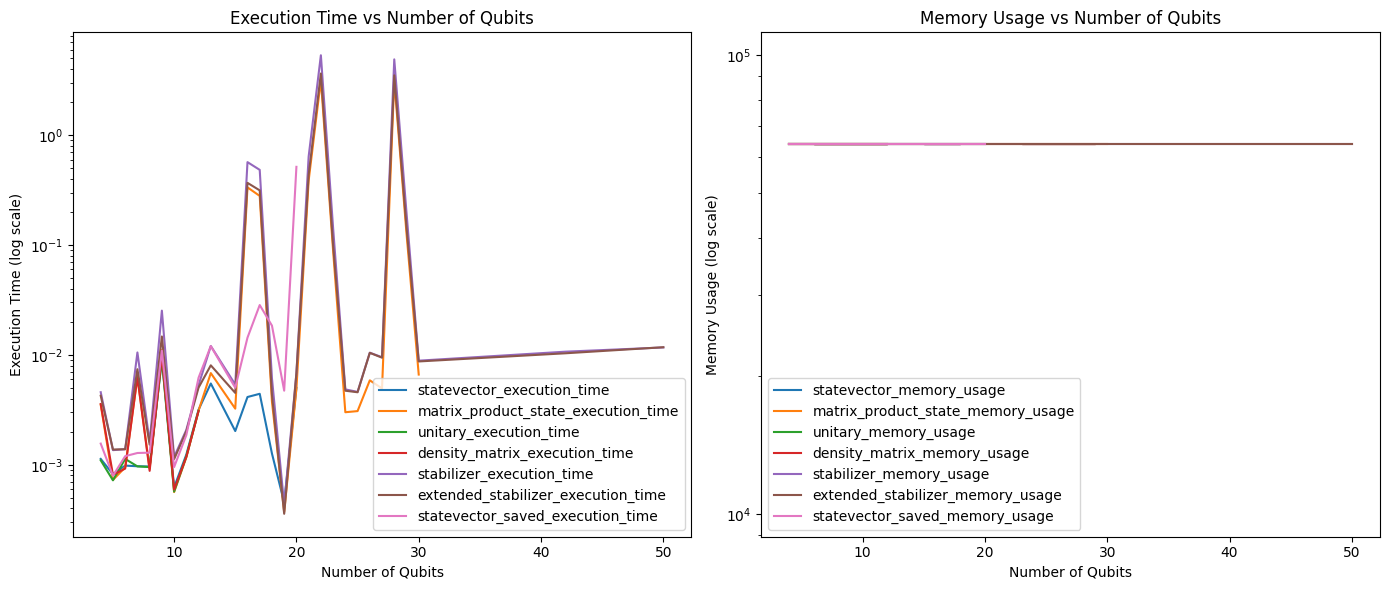

In [7]:
# Now let us plot number of qubits vs execution time and memory usage in a subplot
# Use trends per different algorithms if available, so compare
# statevector, stabilizer, and the others from previous cell outputs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for col in time_columns:
    sns.lineplot(data=data, x='num_qubits', y=col, label=col, errorbar=None)
plt.yscale('log')
plt.title('Execution Time vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (log scale)')
plt.legend()
plt.subplot(1, 2, 2)
for col in memory_columns:
    sns.lineplot(data=data, x='num_qubits', y=col, label=col)
plt.yscale('log')
plt.title('Memory Usage vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Memory Usage (log scale)')
plt.legend()
plt.tight_layout()
plt.show()



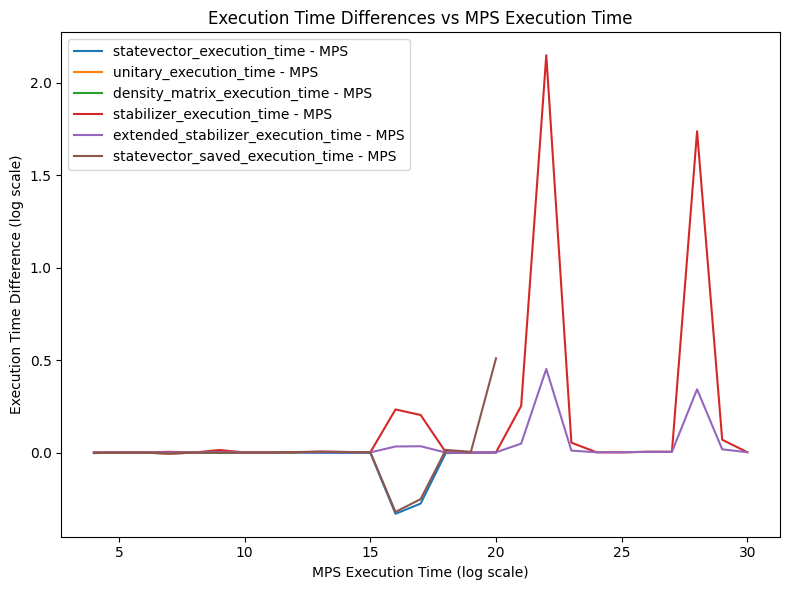

In [8]:
# So the times are very closes to each other
# I want to plot them so that the differences are more visible
# let us plot the data such that our matrix product state method is on x axis
# and the differences are on y axis
plt.figure(figsize=(8, 6))
mps_time = data['matrix_product_state_execution_time']
for col in time_columns:
    if col != 'matrix_product_state_execution_time':
        diff = data[col] - mps_time
        sns.lineplot(data=data, x='num_qubits', y=diff, label=f"{col} - MPS", errorbar=None)
# plt.yscale('log')
# plt.xscale('log')
plt.title('Execution Time Differences vs MPS Execution Time')
plt.xlabel('MPS Execution Time (log scale)')
plt.ylabel('Execution Time Difference (log scale)')
plt.legend()
plt.tight_layout()
plt.show()

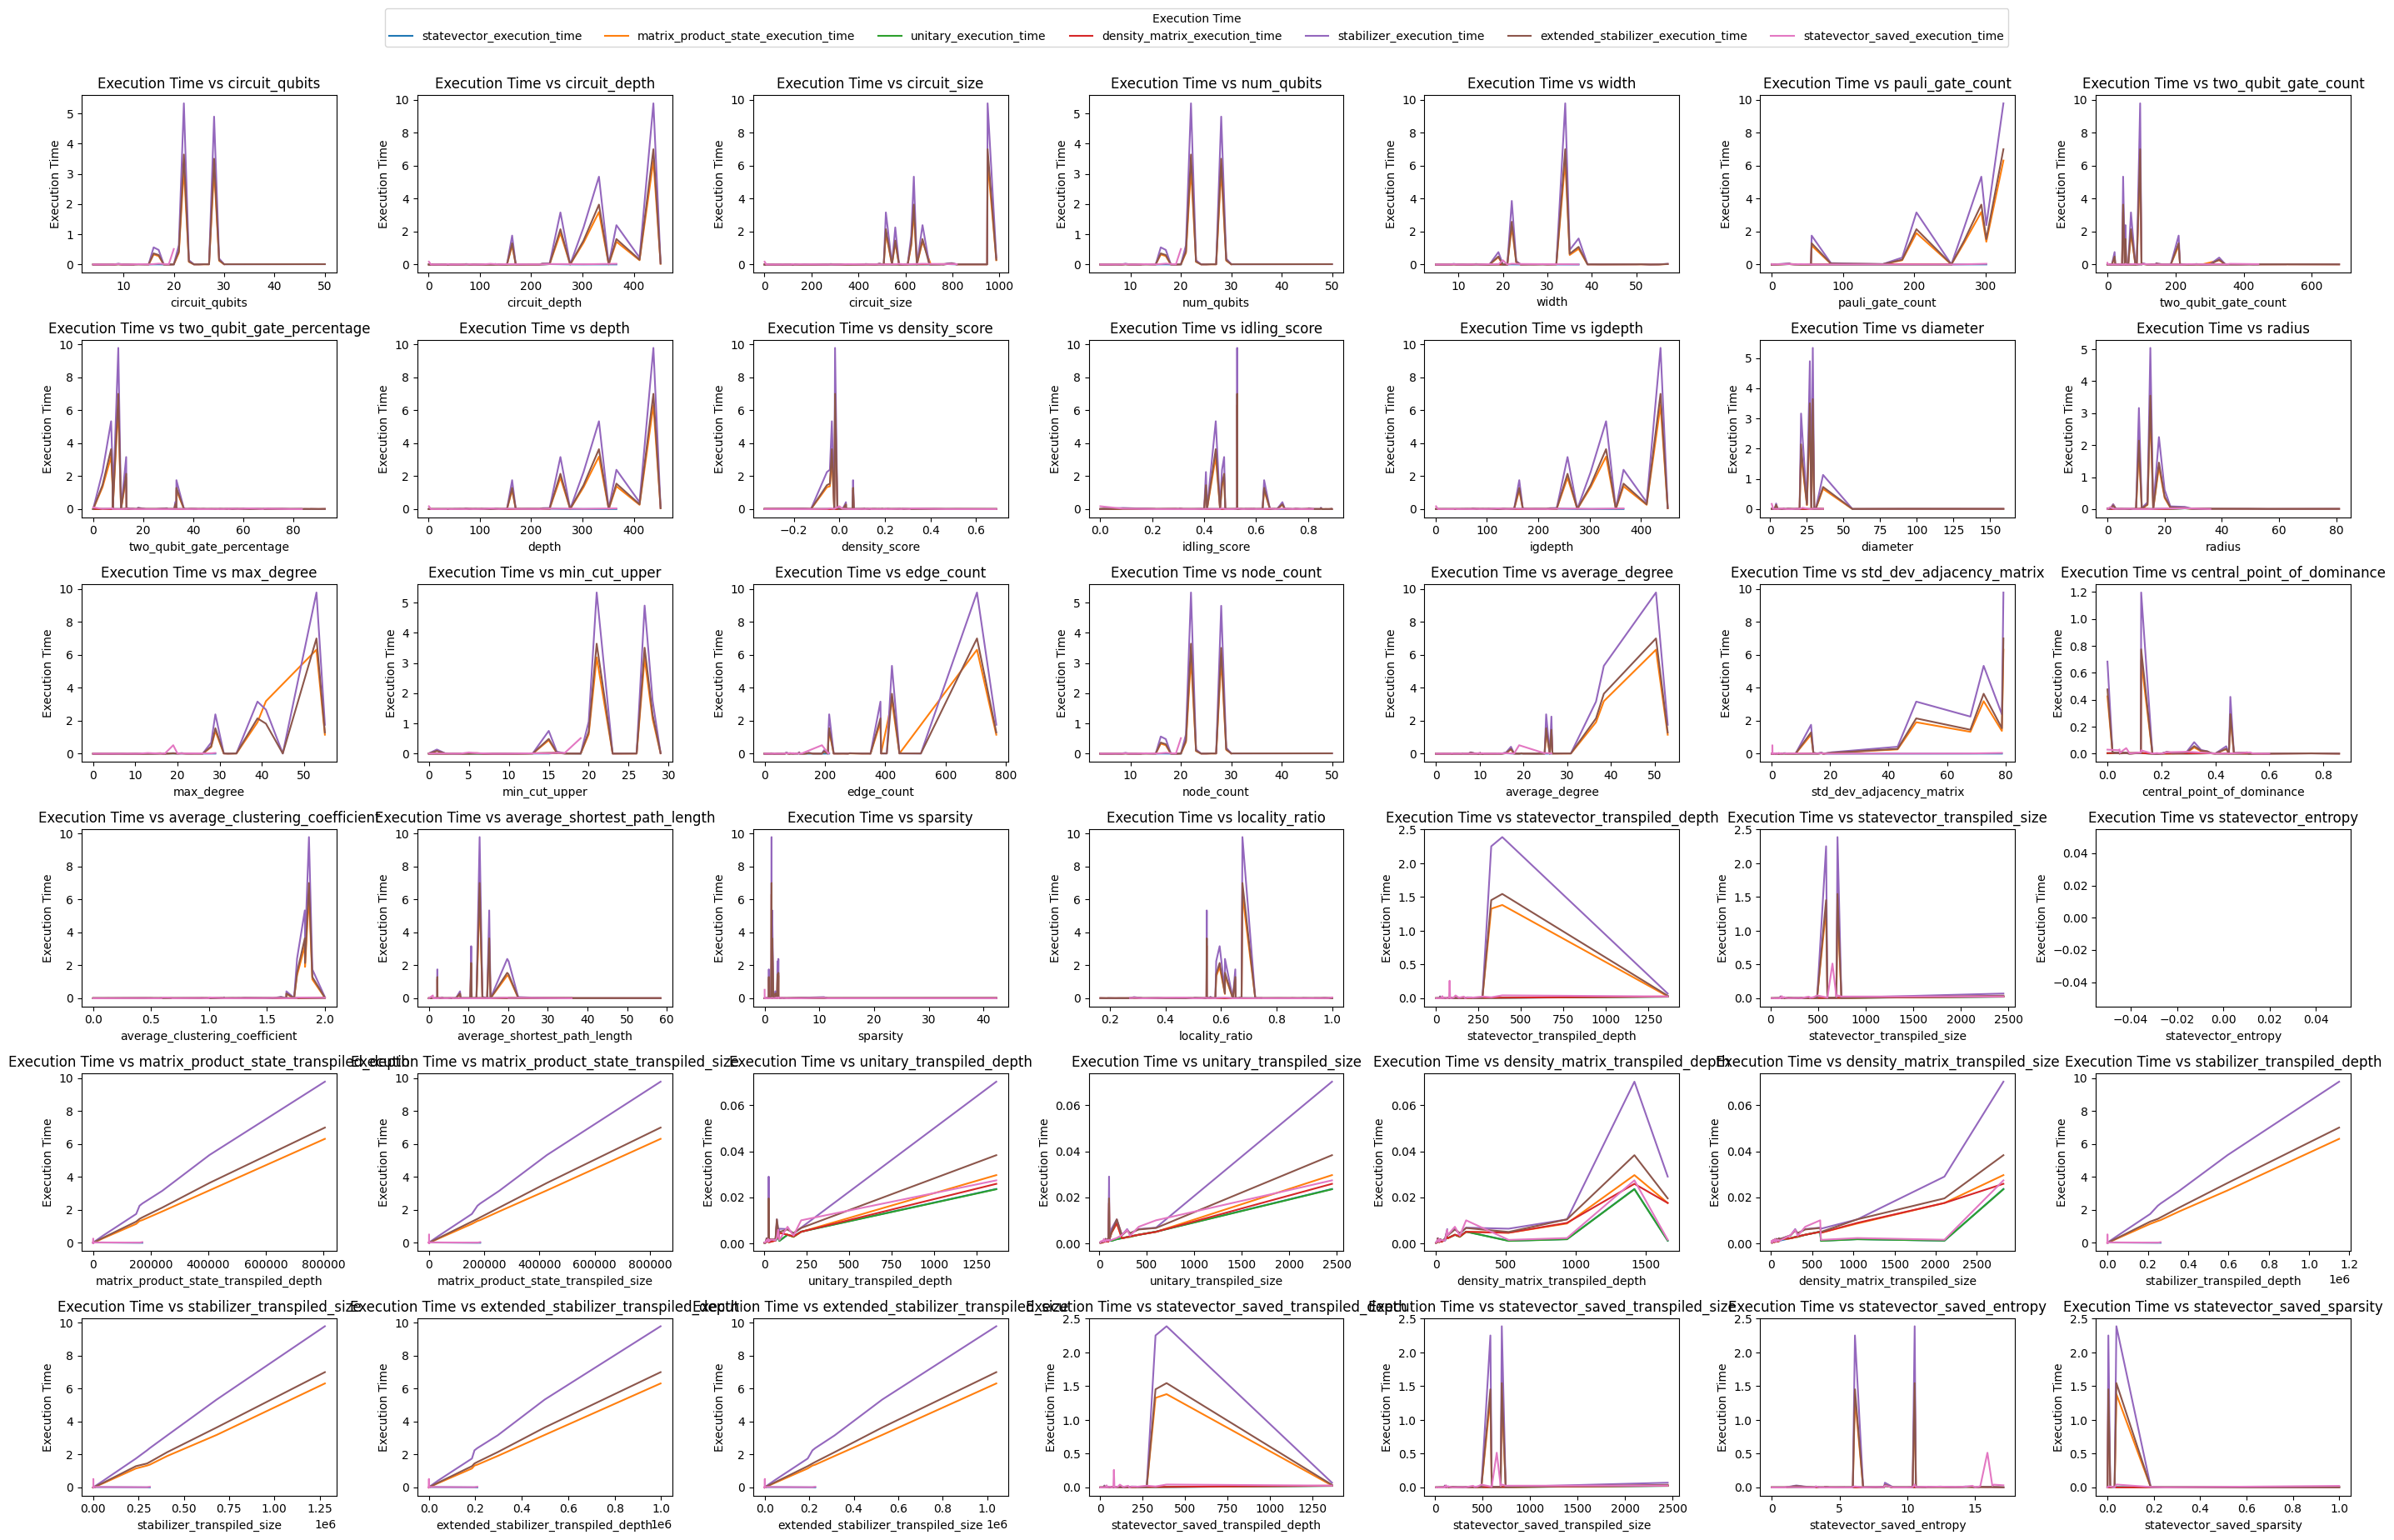

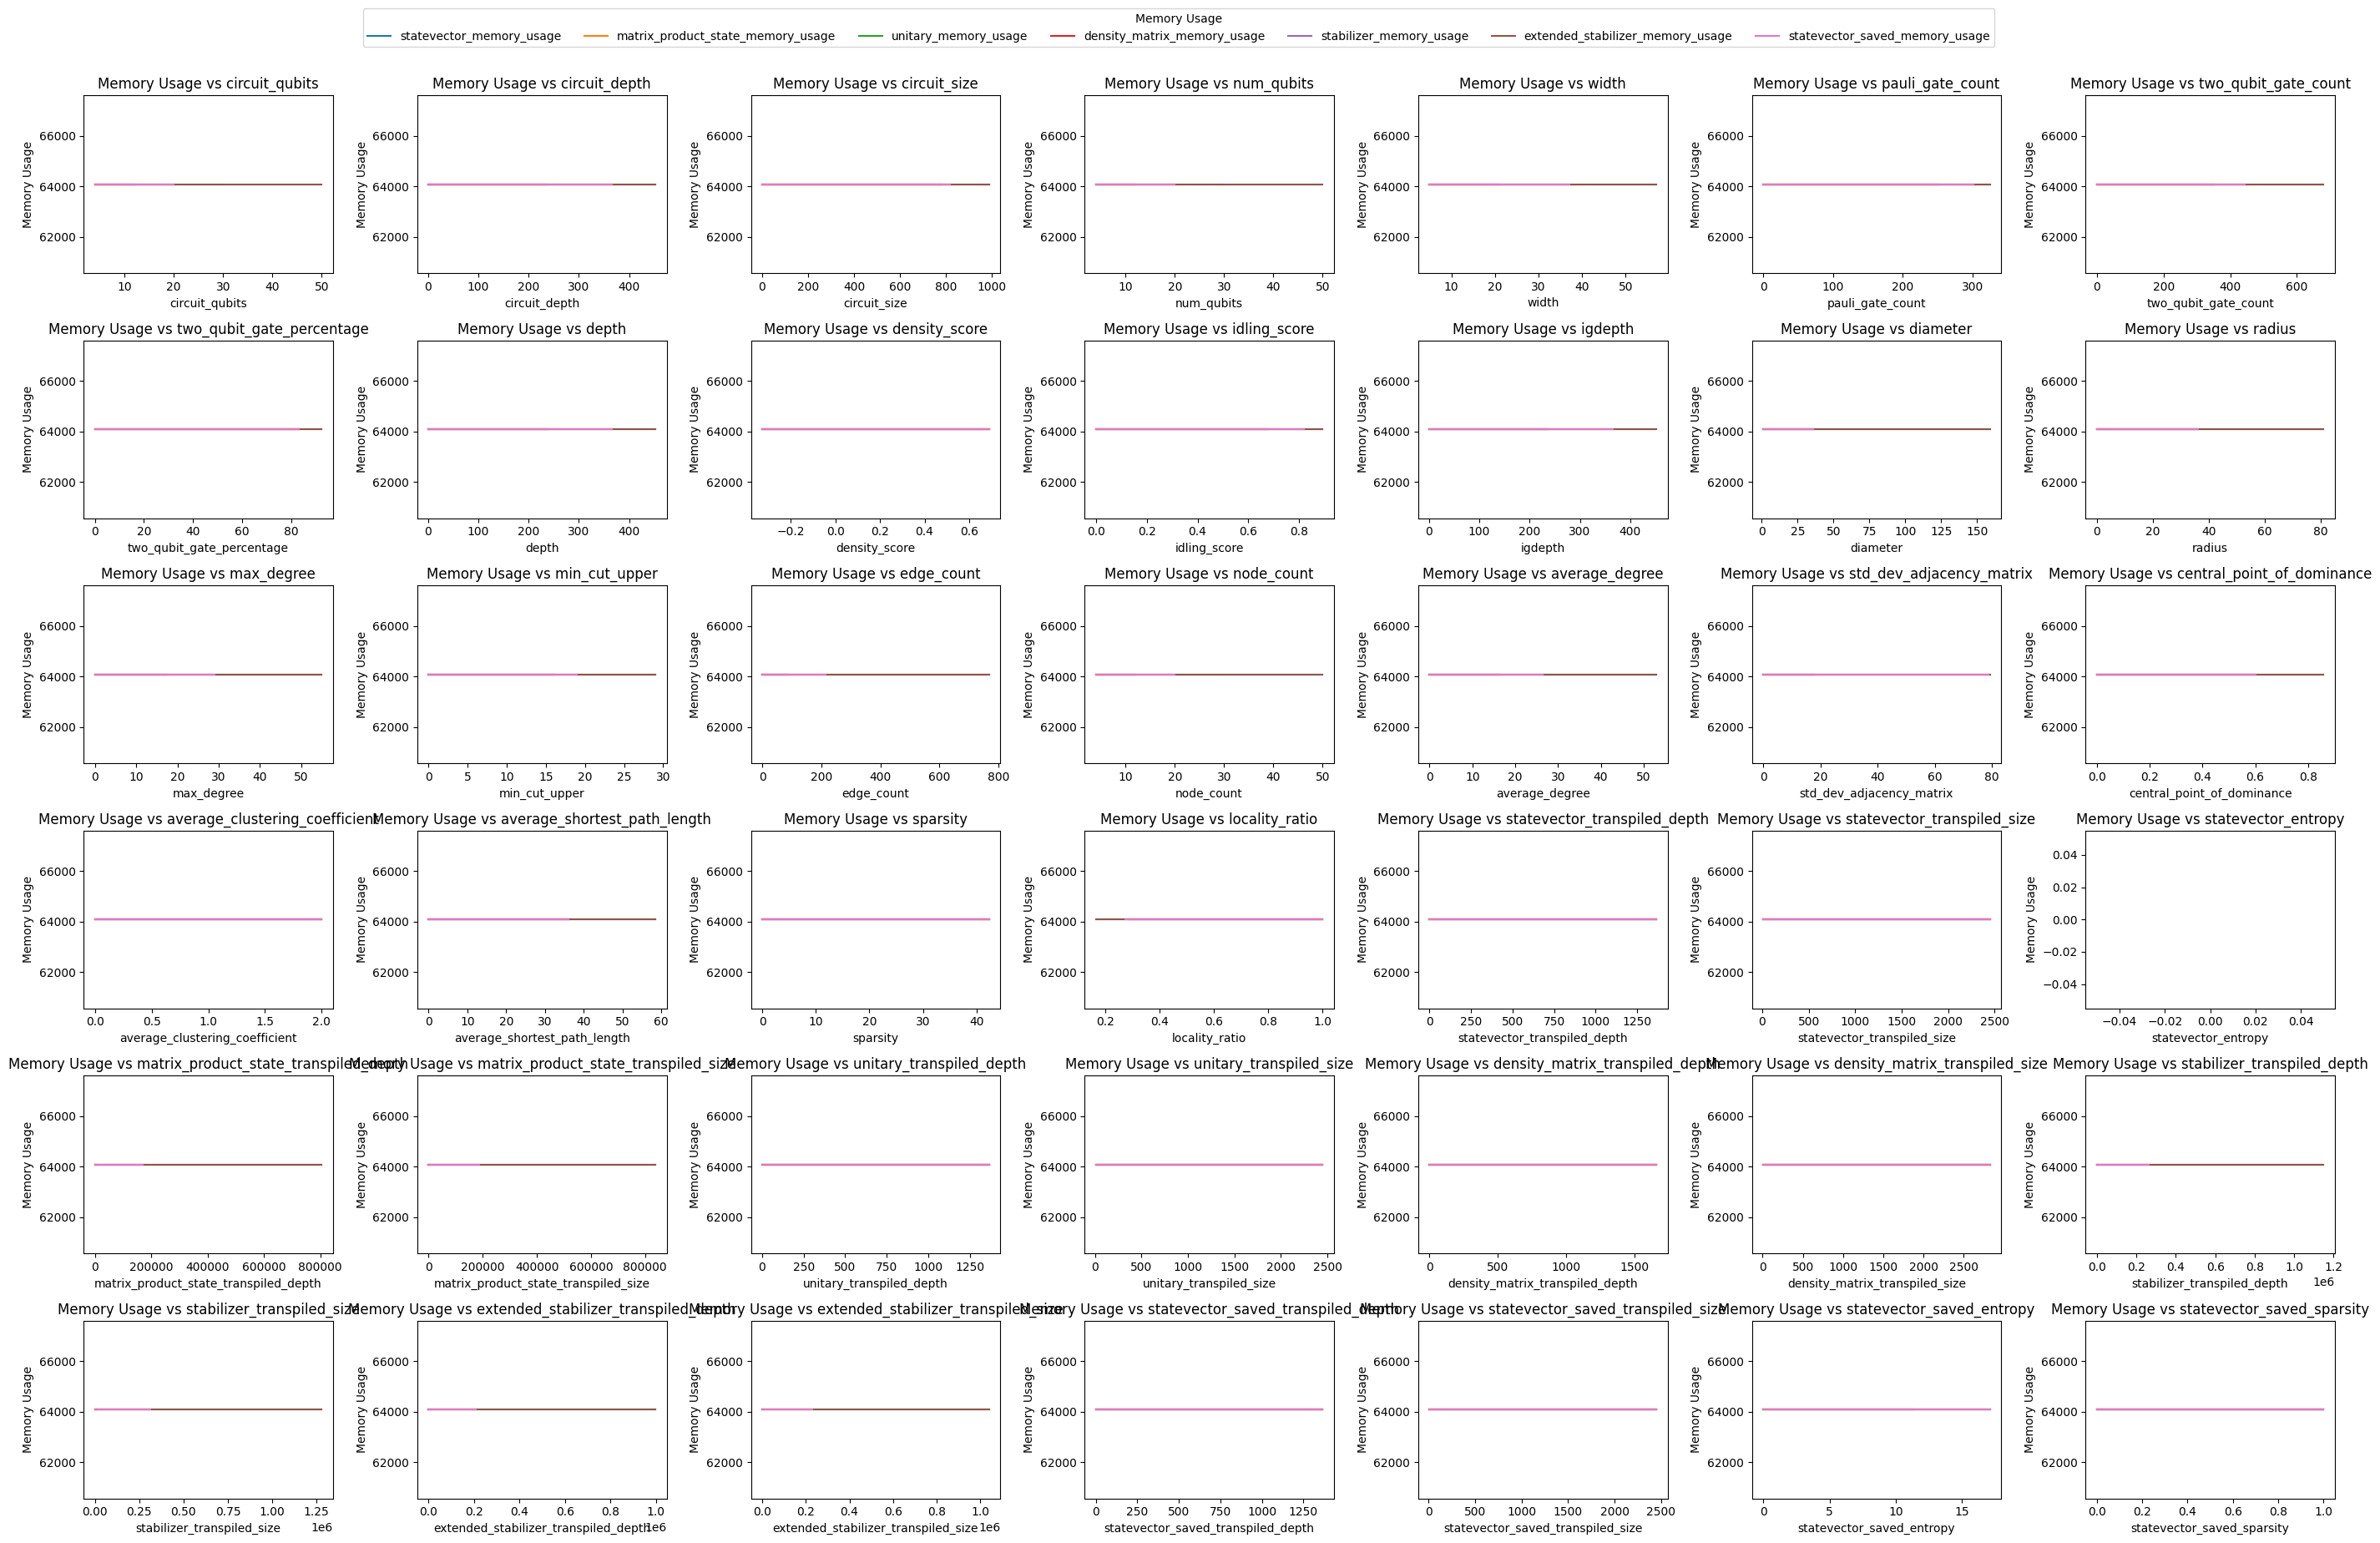

In [9]:
# # Grid subplots for execution times and memory usages against numeric features (no log scale)
exclude = set(time_columns + memory_columns)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
features = [f for f in numeric_columns if f not in exclude]

# def make_grid_and_plot(features_list, y_columns, title_prefix):
#     n = len(features_list)
#     if n == 0:
#         print(f"No numeric features to plot for {title_prefix}.")
#         return
#     ncols = int(np.ceil(np.sqrt(n)))
#     nrows = int(np.ceil(n / ncols))
#     figsize = (4 * ncols, 3 * nrows)
#     fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)
#     axes_flat = axes.flatten()
#     for i, feature in enumerate(features_list):
#         ax = axes_flat[i]
#         for col in y_columns:
#             # skip if y is the same as x
#             if col == feature:
#                 continue
#             sns.lineplot(data=data, x=feature, y=col, ax=ax, label=col, errorbar=None)
#         ax.set_title(f"{title_prefix} vs {feature}")
#         ax.set_xlabel(feature)
#         ax.set_ylabel(title_prefix)
#         ax.legend(fontsize='small')
#     # hide any unused axes
#     for j in range(n, len(axes_flat)):
#         axes_flat[j].set_visible(False)
#     plt.tight_layout()
#     plt.show()

def make_grid_and_plot(features_list, y_columns, title_prefix):
    n = len(features_list)
    if n == 0:
        print(f"No numeric features to plot for {title_prefix}.")
        return

    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))
    # Add a bit more height for the global legend
    figsize = (4 * ncols, 3 * nrows + 0.5) 
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)
    axes_flat = axes.flatten()
    
    # Variables to store legend info (handles and labels)
    legend_handles = None
    legend_labels = None
    
    for i, feature in enumerate(features_list):
        ax = axes_flat[i]
        
        for col in y_columns:
            # skip if y is the same as x
            if col == feature:
                continue
            
            # Use 'errorbar=None' to remove the shaded region (CI) as requested in a previous context
            sns.lineplot(data=data, x=feature, y=col, ax=ax, label=col, errorbar=None)
        
        ax.set_title(f"{title_prefix} vs {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel(title_prefix)
        
        # 1. Collect legend information from the first subplot
        if legend_handles is None:
            legend_handles, legend_labels = ax.get_legend_handles_labels()
        
        # 2. Remove the individual legend from the subplot
        ax.legend().remove()
        
    # 3. Add a global legend to the entire figure
    if legend_handles and legend_labels:
        # Place the legend above the plots
        fig.legend(legend_handles, legend_labels, loc='upper center', 
                   title=title_prefix, bbox_to_anchor=(0.5, 1.0), ncol=len(y_columns))
        
    # hide any unused axes
    for j in range(n, len(axes_flat)):
        axes_flat[j].set_visible(False)
        
    # Adjust subplot parameters for a tight layout, making room for the global legend
    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

# Execution time plots
make_grid_and_plot(features, time_columns, "Execution Time")

# Memory usage plots
make_grid_and_plot(features, memory_columns, "Memory Usage")

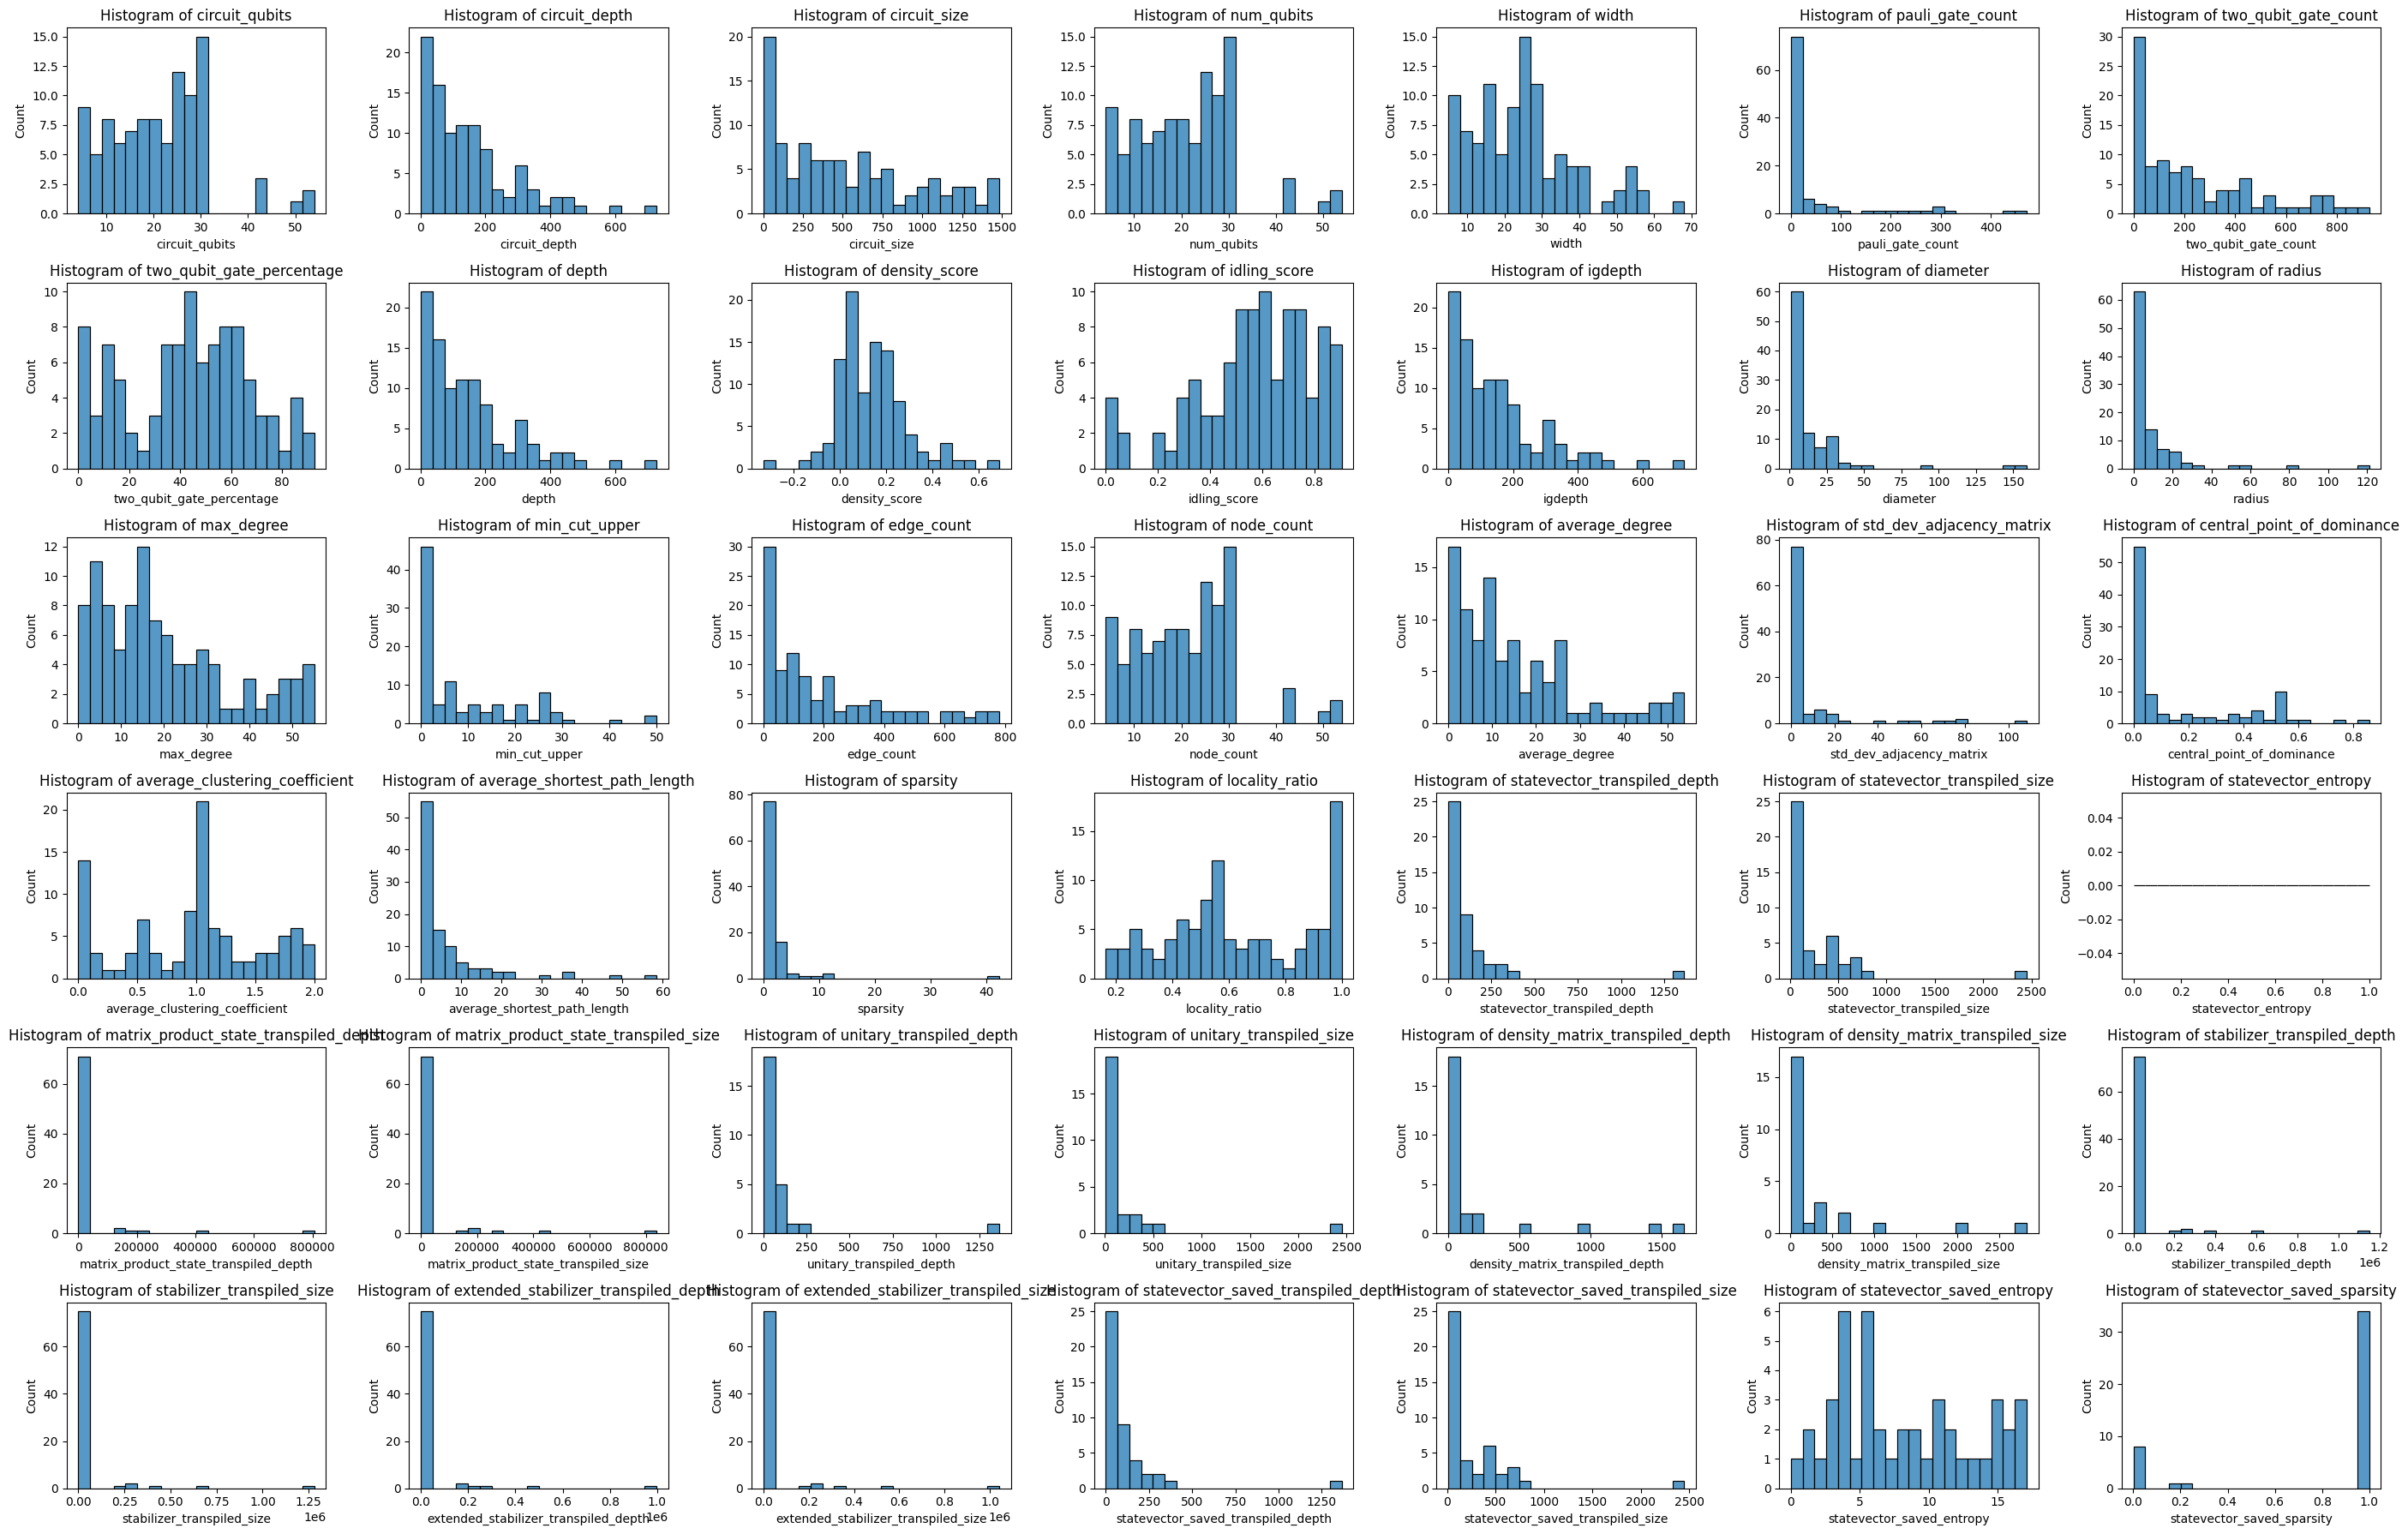

In [17]:
# For these numeric features, let us do histograms to see how many circuits fall into different ranges
# Again in the same neat subplot grid format
def make_histogram_grid(features_list, title_prefix):
    n = len(features_list)
    if n == 0:
        print(f"No numeric features to plot histograms for {title_prefix}.")
        return
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))
    figsize = (4 * ncols, 3 * nrows)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)
    axes_flat = axes.flatten()
    for i, feature in enumerate(features_list):
        ax = axes_flat[i]
        sns.histplot(data=data, x=feature, bins=20, kde=False, ax=ax)
        ax.set_title(f"Histogram of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")
    # hide any unused axes
    for j in range(n, len(axes_flat)):
        axes_flat[j].set_visible(False)
    plt.tight_layout()
    plt.show()
# Histograms for numeric features
make_histogram_grid(features, "Numeric Feature")

